In [1]:
import sys
sys.path.append('../')
sys.path.append('../get_branch/linear')
sys.path.append('../model_json/make_json_program')

import json
import numpy as np
import matplotlib.pyplot as plt

import make_auto_encoder_json
import input_branch
import hidden_branch
import output_branch
import util

In [2]:
make_auto_encoder_json.make_json()

In [3]:
json_file = open('../model_json/json/auto_encoder.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_features': 784, 'out_features': 128, 'layer_type': 'input'},
 'layer1': {'input_features': 128, 'out_features': 64, 'layer_type': 'hidden'},
 'layer2': {'input_features': 64, 'out_features': 12, 'layer_type': 'hidden'},
 'layer3': {'input_features': 12, 'out_features': 3, 'layer_type': 'hidden'},
 'layer4': {'input_features': 3, 'out_features': 12, 'layer_type': 'hidden'},
 'layer5': {'input_features': 12, 'out_features': 64, 'layer_type': 'hidden'},
 'layer6': {'input_features': 64, 'out_features': 128, 'layer_type': 'hidden'},
 'layer7': {'input_features': 128,
  'out_features': 784,
  'layer_type': 'output'}}

In [4]:
all_branch_node_dict = {}
for i in range(len(json_value)):
    get_branch_node_dict = {}
    if json_value["layer" + str(i)]["layer_type"] == "input":
        get_branch_node_dict = input_branch.get_branch(json_value["layer" + str(i)])
        util.renew_dic(all_branch_node_dict,get_branch_node_dict)
        
    
    #前と後ろで枝が伸びているパターン　隠れ層にあるノードを処理。
    #出力ノードの一個前にあるノードもここで処理(outputで判定)
    if json_value["layer" + str(i)]["layer_type"] == "hidden" or json_value["layer" + str(i)]["layer_type"] == "output":
        now_str_layer = "layer" + str(i)
        now_layer_json_value = json_value[now_str_layer]
        before_str_layer = "layer" + str(i-1)
        before_layer_json_value = json_value[before_str_layer]
        get_branch_node_dict = hidden_branch.get_branch(now_layer_json_value,before_layer_json_value)
        util.renew_dic(all_branch_node_dict,get_branch_node_dict)

    if json_value["layer" + str(i)]["layer_type"] == "output":
        get_branch_node_dict = output_branch.get_branch(json_value["layer" + str(i)])
        util.renew_dic(all_branch_node_dict,get_branch_node_dict)
all_branch_node_dict

{128: 1568, 848: 256, 140: 128, 67: 24, 24: 3}

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
hist_list = np.empty(0)
for node_branch,number_of_node in all_branch_node_dict.items():
    #key次数(横軸) valueノード数(縦軸) 
    #number_of_nodeだけnode_branchを増やす
    hist_list = np.append(hist_list,np.full(number_of_node, node_branch))
hist_list

array([128., 128., 128., ...,  24.,  24.,  24.])

(array([  27., 1696.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         256.]),
 array([ 24. , 106.4, 188.8, 271.2, 353.6, 436. , 518.4, 600.8, 683.2,
        765.6, 848. ]),
 <a list of 10 Patch objects>)

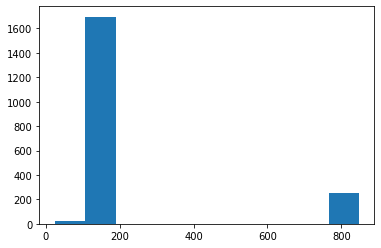

In [6]:
plt.hist(hist_list)